In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import collections
import seaborn as sns
import warnings
from scipy.sparse import csr_matrix

warnings.filterwarnings('ignore')

In [2]:
anime=pd.read_csv("C:/Users/rajitha/Desktop/UConn BAPM/Sem1_Spring21/OPIM 5604-Pred-Pankaj/Project/anime.csv")
rating=pd.read_csv("C:/Users/rajitha/Desktop/UConn BAPM/Sem1_Spring21/OPIM 5604-Pred-Pankaj/Project/rating.csv")

In [3]:
rating_knn = rating[rating.rating != -1]

In [4]:
rating_knn.shape
rating_knn

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


### Unique user Ids

In [5]:
rating_knn['user_id'].nunique()

69600

### Finding users with multiple ratings for the same Anime

In [6]:
duplicate = rating_knn[rating_knn.duplicated(subset=['user_id','anime_id'], keep=False)]
print (duplicate)
duplicate.shape

         user_id  anime_id  rating
4499243    42653      1575       8
4499244    42653      2001       8
4499255    42653     11757       8
4499258    42653     16498       8
4499261    42653     20507       7
4499263    42653     22319       8
4499266    42653     23283       8
4499286    42653      1575       6
4499288    42653      2001      10
4499307    42653     11757       5
4499316    42653     16498       8
4499320    42653     20507       9
4499325    42653     22319       6
4499326    42653     23283       9


(14, 3)

### Removing user 42653 with multiple ratings

In [7]:
rating_knn = rating_knn[rating_knn.user_id != 42653]
rating_knn.shape

(6337151, 3)

### Anime distribution by Type

In [8]:
anime['type'].value_counts()

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

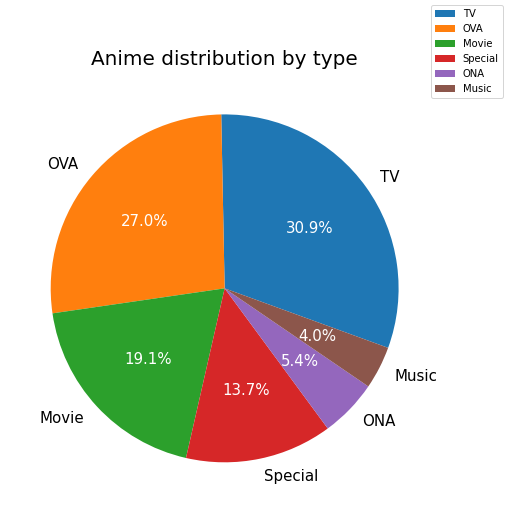

In [9]:
data=anime['type'].value_counts()
y=data.values
plt.figure(figsize=(8,8))
plt.title('Anime distribution by type',fontsize=20)
plt.style.use('tableau-colorblind10')
patches,l_text,p_text=plt.pie(y,labels=data.index,autopct='%.1f%%',startangle=-20)
for i in p_text:
    i.set_size(15)
    i.set_color('w')
for i in l_text:
    i.set_size(15)
plt.figlegend()
plt.show()

### Genre and Count

In [10]:
genre_count=collections.defaultdict(int)
for genres in anime['genre']:
    if not type(genres) is str:
        continue
    data=set()
    for genre1 in genres.split(','):
        if genre1 in data:
            continue
        data.add(genre1)
        genre_count[genre1]+=1
sorted(genre_count.items(),key=lambda x:x[1], reverse=True)

[('Comedy', 3193),
 ('Action', 2845),
 (' Sci-Fi', 1986),
 (' Fantasy', 1815),
 (' Shounen', 1662),
 ('Adventure', 1457),
 (' Comedy', 1452),
 (' Romance', 1371),
 (' Kids', 1213),
 (' School', 1170),
 (' Slice of Life', 1117),
 (' Drama', 1025),
 (' Supernatural', 1023),
 ('Drama', 991),
 ('Hentai', 947),
 (' Adventure', 891),
 (' Mecha', 826),
 (' Magic', 716),
 (' Historical', 636),
 (' Shoujo', 590),
 (' Ecchi', 572),
 (' Seinen', 536),
 (' Sports', 499),
 ('Fantasy', 494),
 (' Super Power', 464),
 (' Music', 457),
 (' Mystery', 421),
 (' Military', 405),
 ('Music', 403),
 ('Kids', 396),
 (' Parody', 393),
 (' Space', 380),
 (' Horror', 295),
 (' Harem', 275),
 (' Martial Arts', 260),
 (' Demons', 209),
 (' Psychological', 206),
 ('Dementia', 206),
 (' Police', 196),
 (' Hentai', 194),
 ('Historical', 170),
 (' Samurai', 146),
 (' Game', 144),
 ('Mecha', 118),
 ('Slice of Life', 103),
 (' Vampire', 101),
 ('Romance', 93),
 (' Thriller', 86),
 ('Demons', 85),
 ('Sci-Fi', 84),
 ('Mys

In [11]:
dict1=dict(genre_count)
x=dict1.keys()
y=dict1.values()
temp={'genre1':list(x),'count1':list(y)}
df=pd.DataFrame.from_dict(temp)
df=df.sort_values(by='count1',ascending=False)[:10]
df

,genre1,count1
18,Comedy,3193
4,Action,2845
15,Sci-Fi,1986
7,Fantasy,1815
10,Shounen,1662
24,Adventure,1457
11,Comedy,1452
1,Romance,1371
57,Kids,1213
2,School,1170


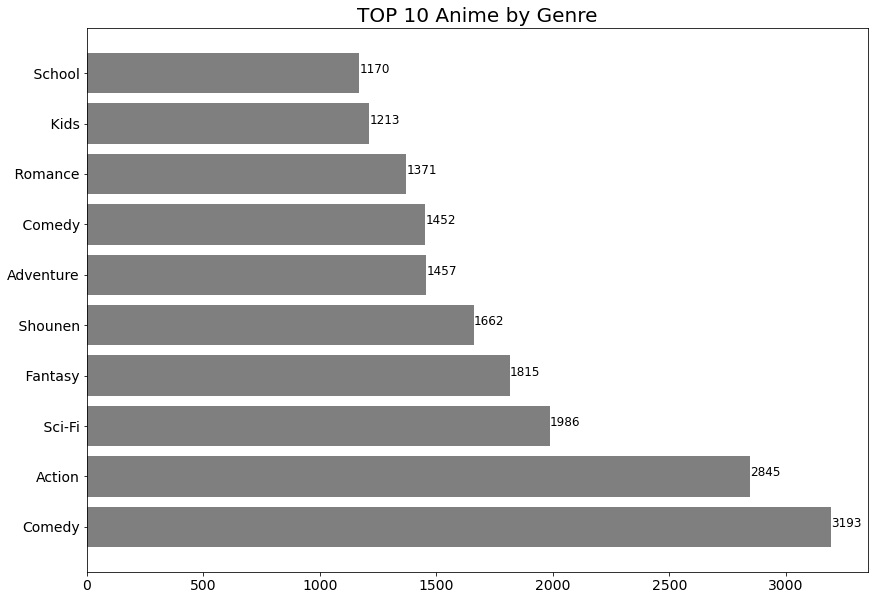

In [12]:
x=df.genre1
y=df.count1

plt.figure(figsize=(14,10))
plt.barh(x,y,color='k',alpha=0.5)
plt.title('TOP 10 Anime by Genre',fontsize=20)
plt.tick_params(labelsize=14)
for i,j in zip(y,x):
    plt.text(i+0.1,j,i,fontsize=12)
plt.show()

### Merging Data

In [13]:
anime_fulldata=pd.merge(anime,rating_knn,on='anime_id',suffixes= ['', '_user'])
anime_fulldata = anime_fulldata.rename(columns={'name': 'anime_title', 'rating_user': 'user_rating'})
anime_fulldata.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10


In [14]:
combine_anime_rating = anime_fulldata.dropna(axis = 0, subset = ['anime_title'])
anime_ratingCount = (combine_anime_rating.
     groupby(by = ['anime_title'])['user_rating'].
     count().reset_index().rename(columns = {'rating': 'totalRatingCount'})
    [['anime_title', 'user_rating']] )

Text(0, 0.5, 'User Rating count')

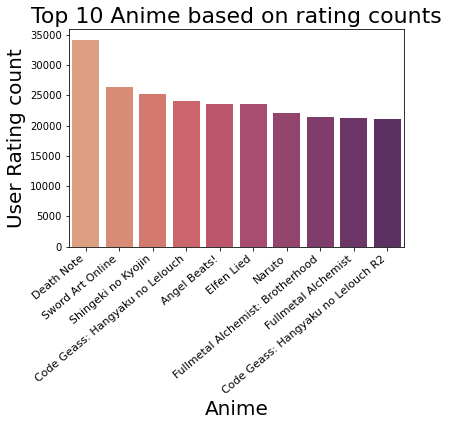

In [15]:
top10_animerating=anime_ratingCount[['anime_title', 'user_rating']].sort_values(by = 'user_rating',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="user_rating", data=top10_animerating, palette="flare")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('User Rating count', fontsize = 20)

### Anime by Members

In [ ]:
duplicate_anime=anime_fulldata.copy()
duplicate_anime.drop_duplicates(subset ="anime_title", 
                     keep = 'first', inplace = True)

In [ ]:
top10_animemembers=duplicate_anime[['anime_title', 'members']].sort_values(by = 'members',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="members", data=top10_animemembers, palette="flare")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on members',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('Community Size', fontsize = 20)

### Keeping active users in ratings dataset

In [17]:
ratings_cnt = pd.DataFrame(rating_knn.groupby('user_id').size(),columns=['count']).sort_index()
ratings_cnt.head()

,count
user_id,
1,4
2,1
3,92
5,459
7,343


In [18]:
ratings_cnt['count'].describe()

count    69599.000000
mean        91.052328
std        135.765228
min          1.000000
25%         13.000000
50%         45.000000
75%        114.000000
max       3747.000000
Name: count, dtype: float64

In [10]:
na_thres_user=20
active_users = list(set(ratings_cnt.query('count >= @na_thres_user').index))

In [11]:
ratings_dropusers = rating_knn[rating_knn.user_id.isin(active_users)]

In [12]:
print(rating_knn.shape);print(ratings_dropusers.shape)

(6337151, 3)
(6164897, 3)


### Keeping popular anime

In [13]:
anime_cnt = pd.DataFrame(rating_knn.groupby('anime_id').size(),columns=['count'])
anime_cnt.head()

,count
anime_id,
1,13448
5,5789
6,9385
7,2169
8,308


In [14]:
anime_cnt['count'].describe()

count     9927.000000
mean       638.375239
std       1795.819116
min          1.000000
25%          9.000000
50%         57.000000
75%        395.000000
max      34226.000000
Name: count, dtype: float64

In [15]:
na_thres_anime=10
pop_anime = list(set(anime_cnt.query('count >= @na_thres_anime').index))

In [16]:
ratings_dropanime = ratings_dropusers[ratings_dropusers.anime_id.isin(pop_anime)]


In [17]:
print(ratings_dropusers.shape);print(ratings_dropanime.shape)

(6164897, 3)
(6156670, 3)


### Preparing data for KNN 

In [18]:
#rating_new=rating_new[:4000000]
KNN = ratings_dropanime.pivot(
    index='anime_id',
    columns='user_id',
    values='rating').fillna(0)

In [19]:
KNN.shape

(7365, 47152)

In [20]:
from sklearn.cluster import KMeans

In [ ]:
 kmeans = KMeans(n_clusters=2, random_state=0).fit(KNN)

In [ ]:
KNN.to_csv('KNN.csv')

In [ ]:
KNN

In [ ]:
KNN.dropna(axis=1,how='all')

### Creating sparse matrix

In [ ]:
mat_knn = csr_matrix(KNN.values)